<a href="https://colab.research.google.com/github/yu-peihsuan/AccountBookApp/blob/main/detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ==========================================
# CELL 1: 訓練動物偵測模型 (Animal Detection)
# 使用 Roboflow + YOLOv5
# ==========================================

import os
import yaml

# ------------------------------------------------
# 1. 重置環境與安裝 YOLOv5
# ------------------------------------------------
%cd /content
if os.path.exists('yolov5'):
    !rm -rf yolov5

print("⬇️ 正在安裝 YOLOv5 環境...")
!git clone https://github.com/ultralytics/yolov5 > /dev/null
%cd yolov5
!pip install -qr requirements.txt
!pip install roboflow


# ------------------------------------------------
# 2. 從 Roboflow 下載資料集（animaldetection-nuwtl）
# ------------------------------------------------
print("\n正在下載 Roboflow 資料集 (animaldetection-nuwtl)...")

from roboflow import Roboflow
rf = Roboflow(api_key="i4nEgniBJErNe1XLlx9e")
project = rf.workspace("peixuan").project("detection2-6wtk0")
version = project.version(1)
dataset = version.download("yolov5")



print(f"\n資料集下載位置: {dataset.location}")

# ------------------------------------------------
# 3. 自動偵測 train / val / test 路徑
# ------------------------------------------------
def find_images_folder(base_path, folder_names):
    """在 base_path 中尋找 train/val/test/images 資料夾"""
    for folder in folder_names:
        path = os.path.join(base_path, folder, "images")
        if os.path.exists(path):
            return path
    return None

train_path = find_images_folder(dataset.location, ["train", "Train"])
val_path   = find_images_folder(dataset.location, ["valid", "val", "Valid"])
test_path  = find_images_folder(dataset.location, ["test", "Test"])

if not train_path:
    raise RuntimeError("找不到 train/images，請確認 Roboflow 專案是 Detection 類型")

if not val_path:
    print("找不到 val/images，將使用 train 代替")
    val_path = train_path

if not test_path:
    test_path = val_path

print(f"✅ Train: {train_path}")
print(f"✅ Val:   {val_path}")
print(f"✅ Test:  {test_path}")

# ------------------------------------------------
# 4. 重寫 data.yaml（自動讀取類別）
# ------------------------------------------------
yaml_path = f"{dataset.location}/data.yaml"

data_config = {
    "path": dataset.location,
    "train": train_path,
    "val": val_path,
    "test": test_path,
    "nc": 1,
    "names": ["object"]
}

# 嘗試讀取 Roboflow 原始類別
try:
    with open(yaml_path, "r") as f:
        old_yaml = yaml.safe_load(f)
        if "names" in old_yaml:
            data_config["names"] = old_yaml["names"]
            data_config["nc"] = len(old_yaml["names"])
except Exception as e:
    print("無法讀取原始 data.yaml，使用預設設定")

with open(yaml_path, "w") as f:
    yaml.dump(data_config, f)

print("\n最終 data.yaml 內容：")
!cat {yaml_path}

print(f"\n模型將學習 {data_config['nc']} 個類別：{data_config['names']}")

# ------------------------------------------------
# 5. 開始訓練 YOLOv5
# ------------------------------------------------
print("\n開始訓練模型（50 epochs）...\n")

!python train.py \
    --img 640 \
    --batch 16 \
    --epochs 50 \
    --data {yaml_path} \
    --weights yolov5s.pt \
    --cache


/content
⬇️ 正在安裝 YOLOv5 環境...
Cloning into 'yolov5'...
remote: Enumerating objects: 17757, done.
remote: Counting objects: 100% (118/118), done.
remote: Compressing objects: 100% (79/79), done.
remote: Total 17757 (delta 73), reused 39 (delta 39), pack-reused 17639 (from 4)
Receiving objects: 100% (17757/17757), 17.10 MiB | 6.87 MiB/s, done.
Resolving deltas: 100% (12052/12052), done.
/content/yolov5

⬇️ 正在下載 Roboflow 資料集 (animaldetection-nuwtl)...
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Detection2-1 in yolov5pytorch:: 100%|██████████| 738/738 [00:00<00:00, 3959.97it/s]



📁 資料集下載位置: /content/yolov5/Detection2-1
✅ Train: /content/yolov5/Detection2-1/train/images
✅ Val:   /content/yolov5/Detection2-1/valid/images
✅ Test:  /content/yolov5/Detection2-1/test/images

📄 最終 data.yaml 內容：
names:
- chicken
- duck
- goose
nc: 3
path: /content/yolov5/Detection2-1
test: /content/yolov5/Detection2-1/test/images
train: /content/yolov5/Detection2-1/train/images
val: /content/yolov5/Detection2-1/valid/images

🧠 模型將學習 3 個類別：['chicken', 'duck', 'goose']

🚀 開始訓練模型（50 epochs）...

wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-12-13 13:07:57.329142: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1765631277.352573    6958 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin

In [ ]:
# ==========================================
# CELL 1: 快速安裝環境 (不需訓練)
# ==========================================
import os

# 1. 下載 YOLOv5 程式碼
%cd /content
if os.path.exists('yolov5'):
    !rm -rf yolov5
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -qr requirements.txt

print("\n環境準備好了！現在請你看下面的說明，把 best.pt 丟進來。")

/content
Cloning into 'yolov5'...
remote: Enumerating objects: 17763, done.
remote: Counting objects: 100% (125/125), done.
remote: Compressing objects: 100% (86/86), done.
remote: Total 17763 (delta 74), reused 39 (delta 39), pack-reused 17638 (from 4)
Receiving objects: 100% (17763/17763), 17.10 MiB | 18.69 MiB/s, done.
Resolving deltas: 100% (12053/12053), done.
/content/yolov5

✅ 環境準備好了！現在請你看下面的說明，把 best.pt 丟進來。


✅ 模型準備就緒: /content/yolov5/best.pt

⬇️ 請點擊按鈕，善用 Ctrl 或 Shift 鍵一次選取多張照片...


Saving 253428_0.jpg to 253428_0 (1).jpg
Saving 253432_0.jpg to 253432_0 (1).jpg
Saving 253437_1.jpg to 253437_1 (1).jpg

📸 共收到 3 張照片，開始批次偵測...

[1/3] 🔍 正在辨識: 253428_0 (1).jpg ...
detect: weights=['/content/yolov5/best.pt'], source=253428_0 (1).jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.35, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-452-ge4ab07b6 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/yolov5/253428_0 (1).jpg: 640x480 3 chickens, 2 ducks, 31.9ms
Speed: 0.6ms pre-process, 31.9ms inference, 51.4ms NMS per image 

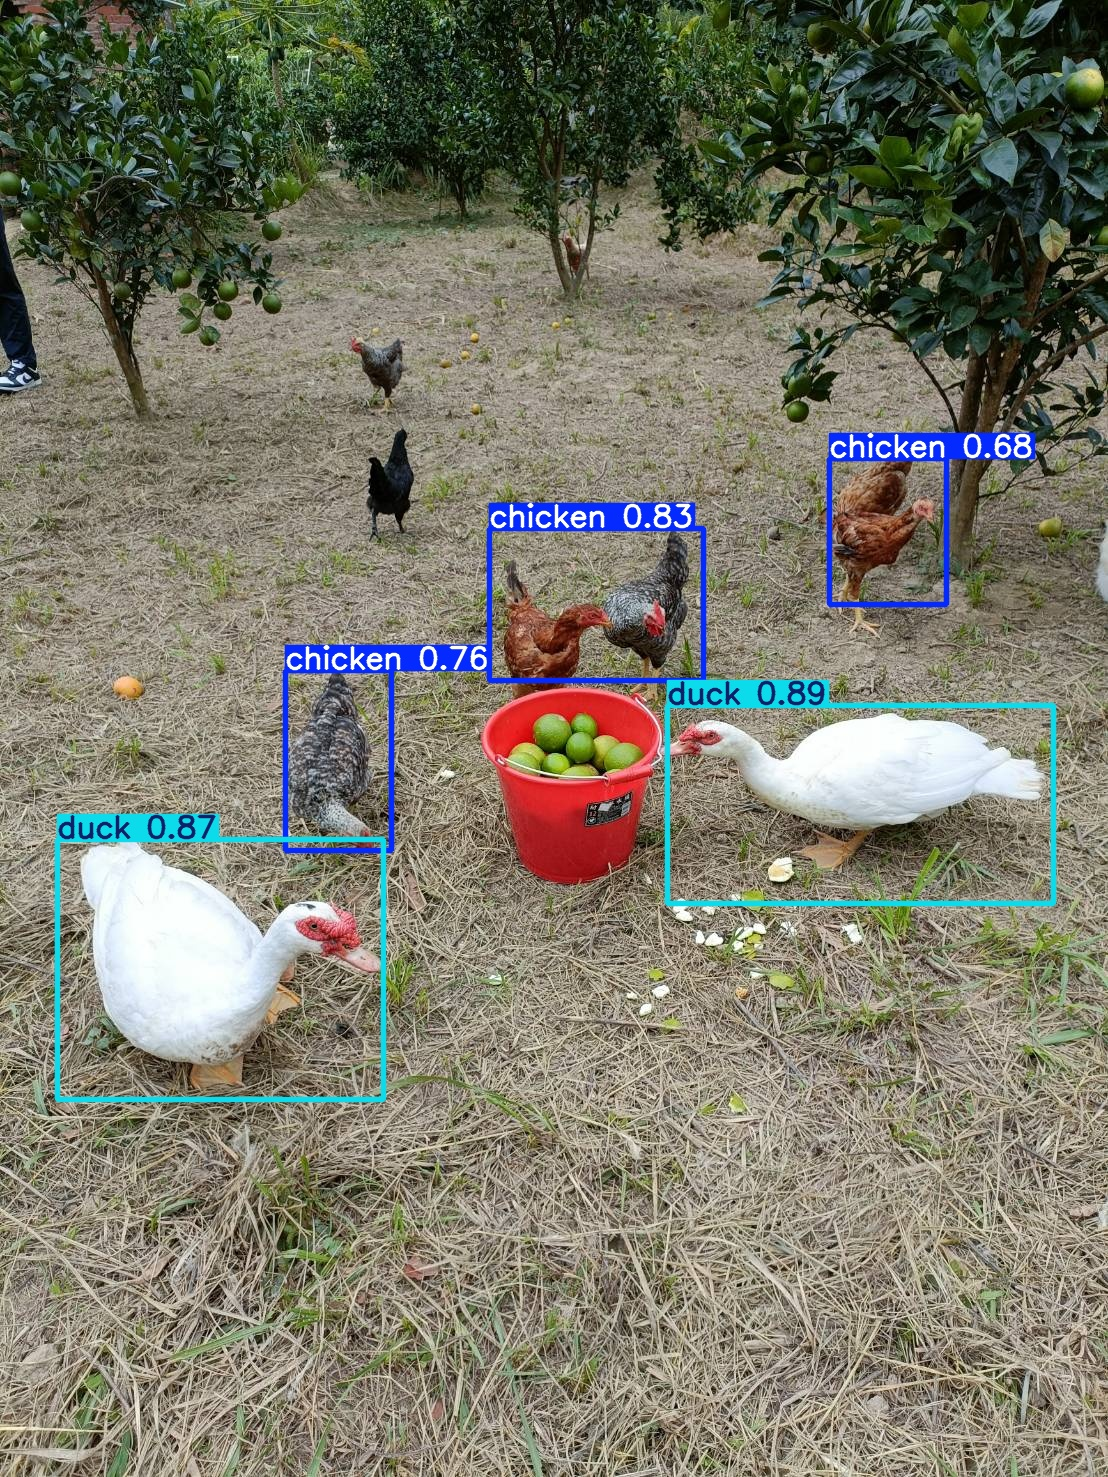

✅ 完成！

[2/3] 🔍 正在辨識: 253432_0 (1).jpg ...
detect: weights=['/content/yolov5/best.pt'], source=253432_0 (1).jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.35, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-452-ge4ab07b6 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/yolov5/253432_0 (1).jpg: 640x480 2 ducks, 32.7ms
Speed: 0.5ms pre-process, 32.7ms inference, 101.8ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp2


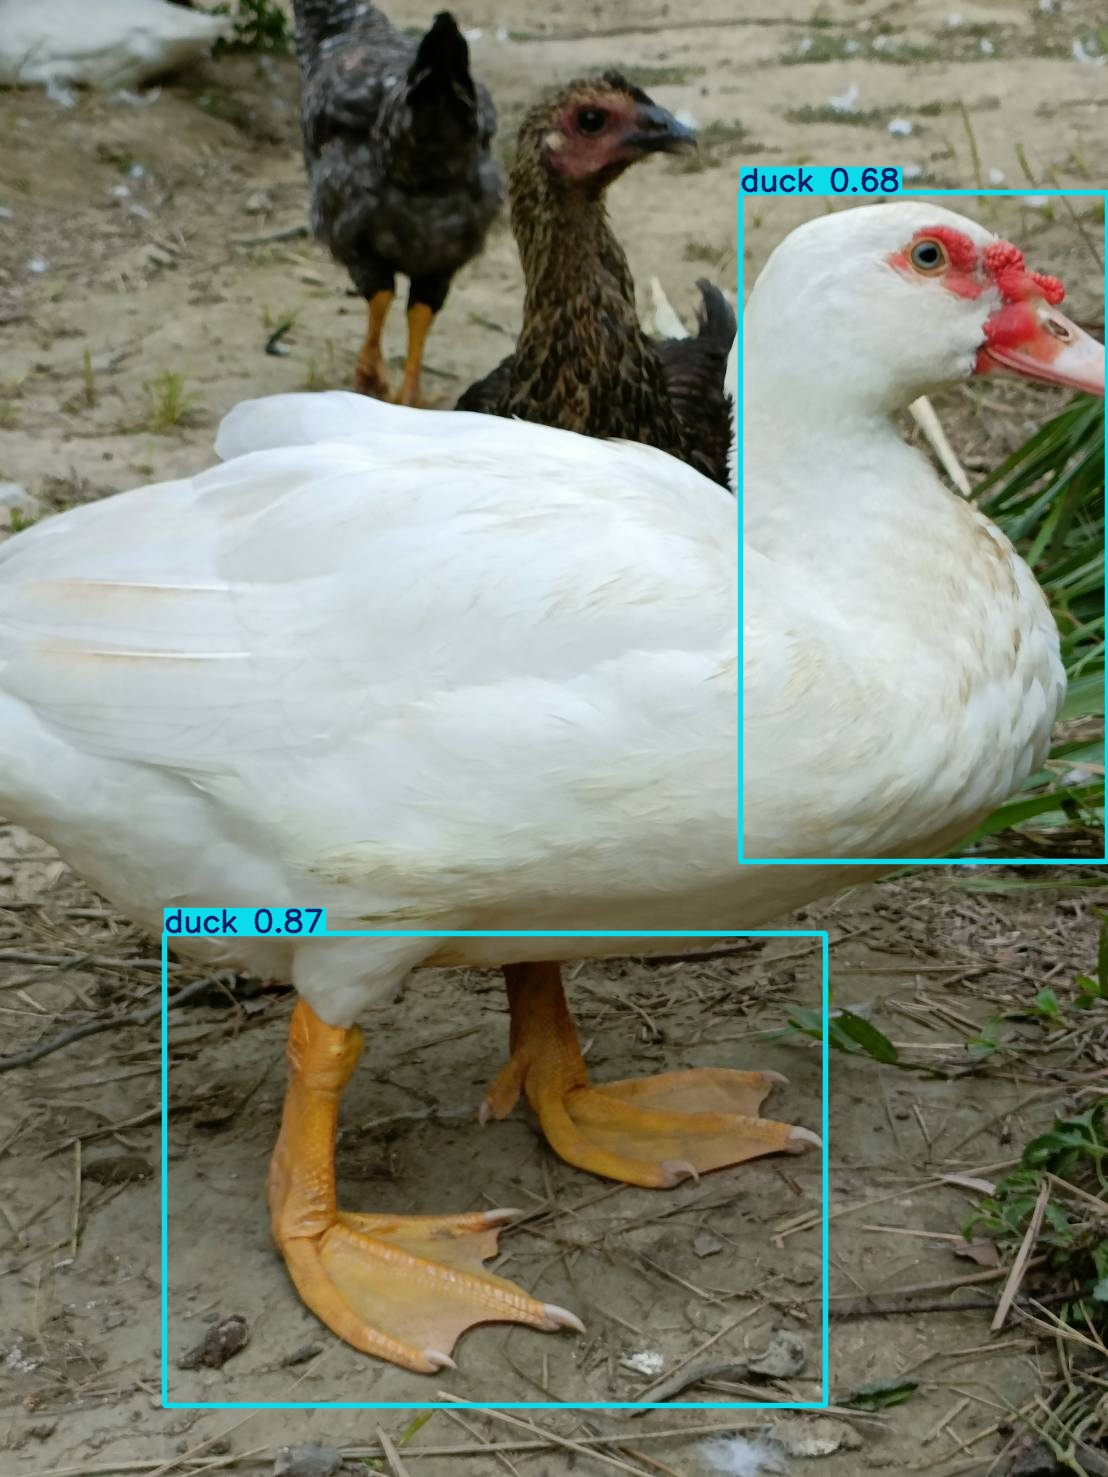

✅ 完成！

[3/3] 🔍 正在辨識: 253437_1 (1).jpg ...
detect: weights=['/content/yolov5/best.pt'], source=253437_1 (1).jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.35, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-452-ge4ab07b6 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/yolov5/253437_1 (1).jpg: 640x480 2 chickens, 33.0ms
Speed: 0.6ms pre-process, 33.0ms inference, 95.1ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp3


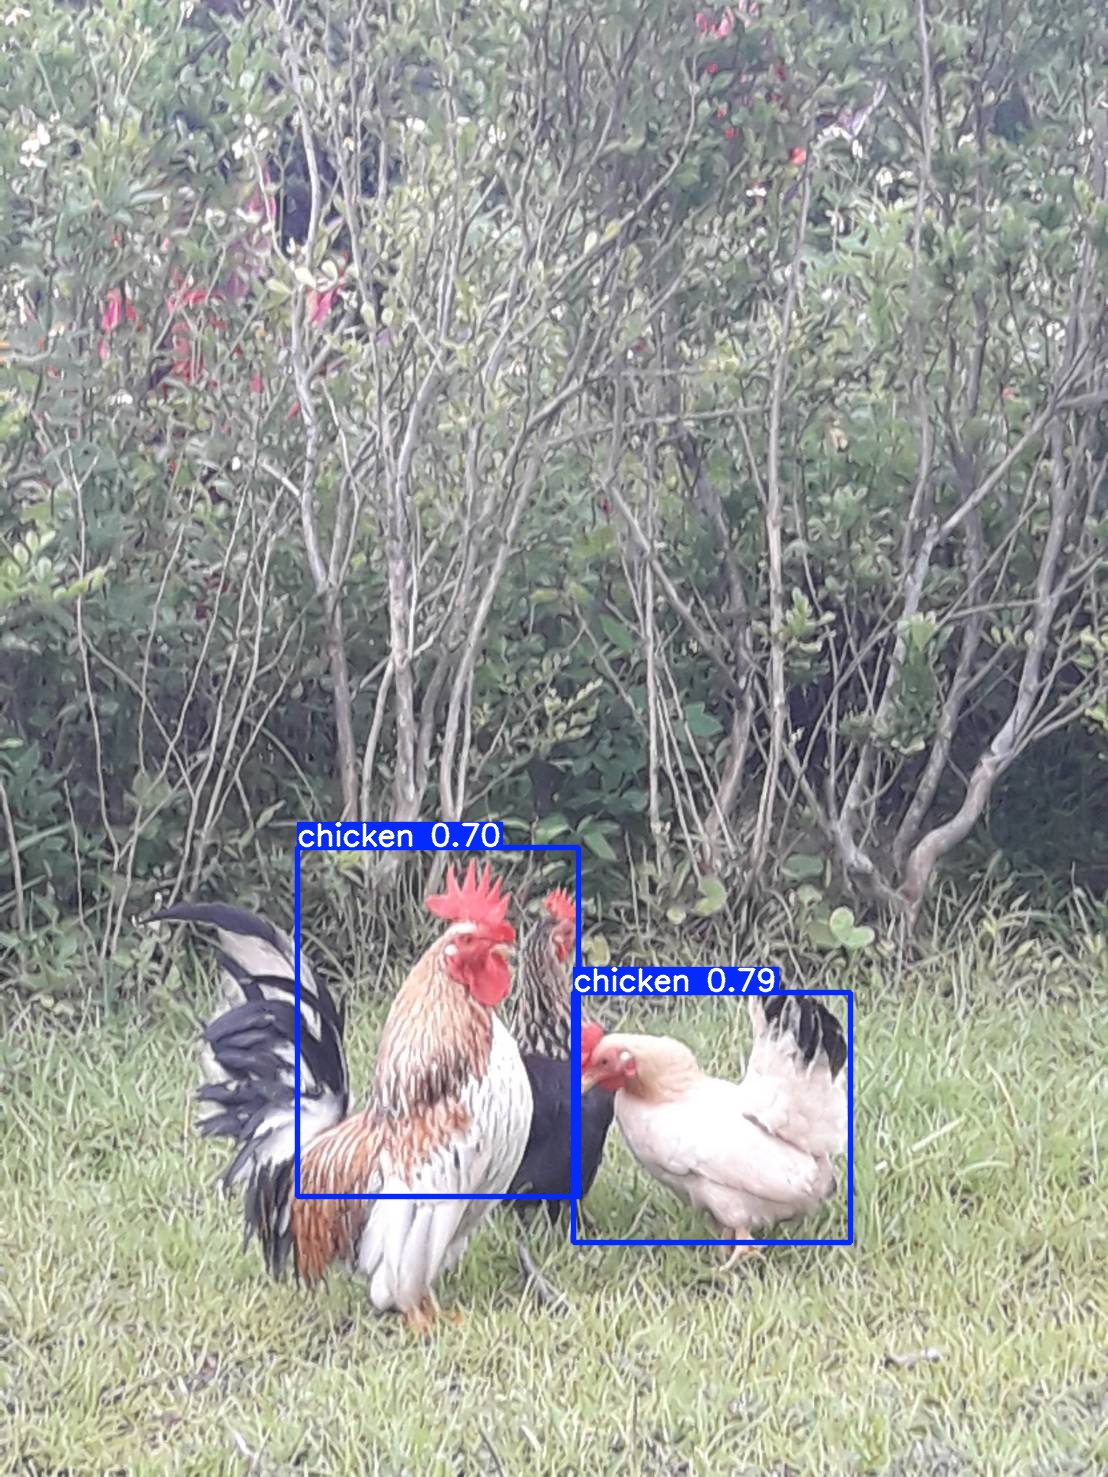

✅ 完成！



In [ ]:
# ==========================================
# CELL 2: 批次測試 (一次上傳多張)
# ==========================================
import os
import glob
from google.colab import files
from IPython.display import Image, display

# 1. 設定你的模型路徑 (確保 best.pt 已經在 yolov5 資料夾內)
weights_path = "/content/yolov5/best.pt"

if not os.path.exists(weights_path):
    print("找不到 best.pt！請先將檔案拖入左側 yolov5 資料夾。")
else:
    print(f"模型準備就緒: {weights_path}")
    print("\n請點擊按鈕，善用 Ctrl 或 Shift 鍵一次選取多張照片...")

    # 這裡支援多檔上傳
    uploaded = files.upload()

    # 顯示分隔線
    print("\n" + "="*40)
    print(f"共收到 {len(uploaded)} 張照片，開始批次偵測...")
    print("="*40 + "\n")

    # 迴圈：一張一張處理
    for i, filename in enumerate(uploaded.keys(), 1):
        print(f"[{i}/{len(uploaded)}] 正在辨識: {filename} ...")

        # 執行偵測
        !python detect.py --weights {weights_path} --img 640 --conf 0.25 --source "{filename}"

        # 抓取結果圖
        try:
            latest_detect = max(glob.glob('runs/detect/exp*'), key=os.path.getmtime)
            result_path = f"{latest_detect}/{filename}"

            if os.path.exists(result_path):
                display(Image(filename=result_path, width=400)) # 縮小一點方便瀏覽
                print(f"✅ 完成！\n")
            else:
                print(f"找不到結果圖\n")
        except:
            print("發生錯誤\n")